<a href="https://colab.research.google.com/github/brunom764/machineLearning/blob/main/visaoComputacional2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import cv2 # OpenCV
import numpy as np

In [113]:
imagem1 = cv2.imread('/content/Ceara-800x533.jpg') # Imagem em jpg 800x533 formada por lista de pixels em BGR
imagem2 = cv2.imread('/content/Pernambuco-800x533.jpg') # Imagem em jgp 800x533 formada por lista de pixels em BGR

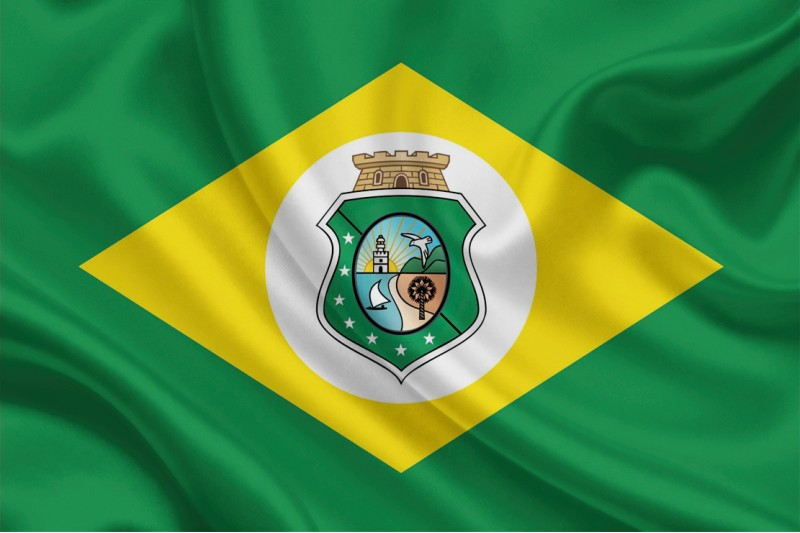

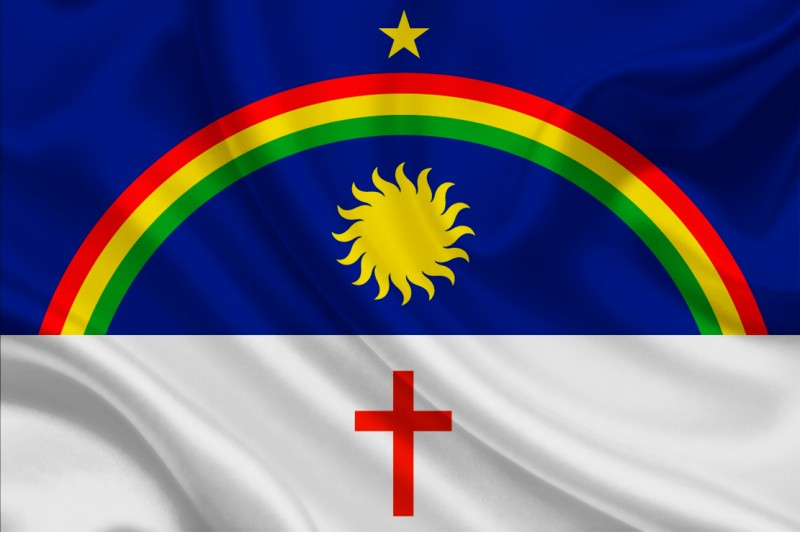

In [115]:

from google.colab.patches import cv2_imshow
cv2_imshow(imagem1)
cv2_imshow(imagem2)

In [116]:
def retornaRGB(imagem,x,y):
  (b, g, r) = imagem[x, y] #veja que a ordem BGR e não RGB
  print(f'O pixel ({x}, {y}) tem as seguintes cores:')
  print(f'Vermelho:{r}, Verde:{g}, Azul:{b}')

retornaRGB(imagem2,10,12)

O pixel (10, 12) tem as seguintes cores:
Vermelho:0, Verde:22, Azul:124


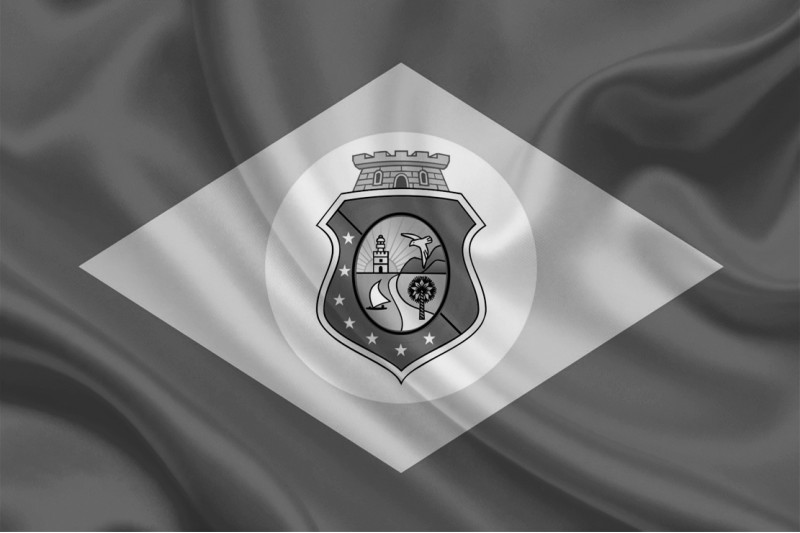

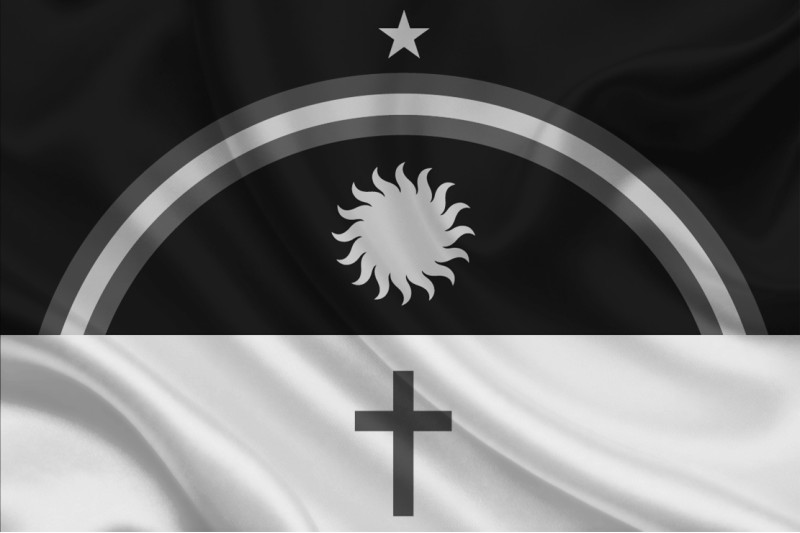

In [117]:
img1Cinza = cv2.imread('/content/Ceara-800x533.jpg',0)
cv2_imshow(img1Cinza)

img2Cinza = cv2.imread('/content/Pernambuco-800x533.jpg',0)
cv2_imshow(img2Cinza)

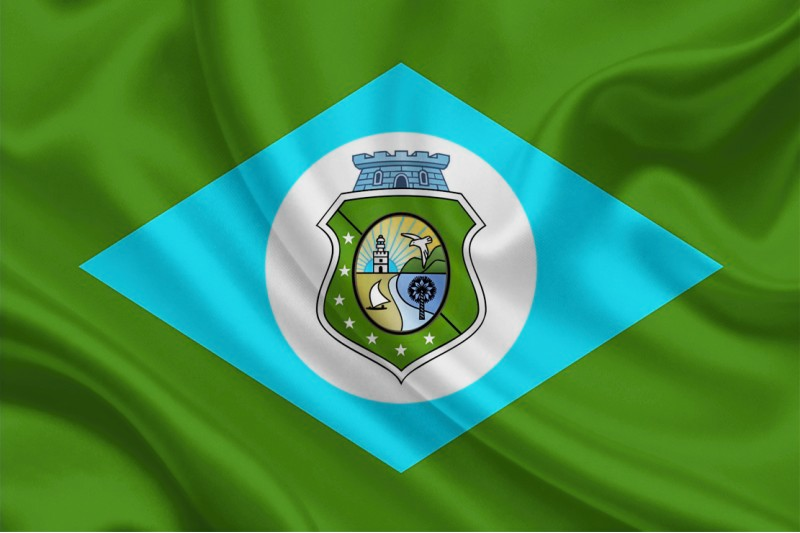

In [121]:
def inverteRGB(imagem):
  for x in range(0, imagem.shape[0]):
    for y in range(0, imagem.shape[1]):
      (b, g, r) = imagem[x, y]
      imagem[x, y] = (r, g, b)
  return imagem
      

imgInv1 = inverteRGB(imagem1)
cv2_imshow(imgInv1)

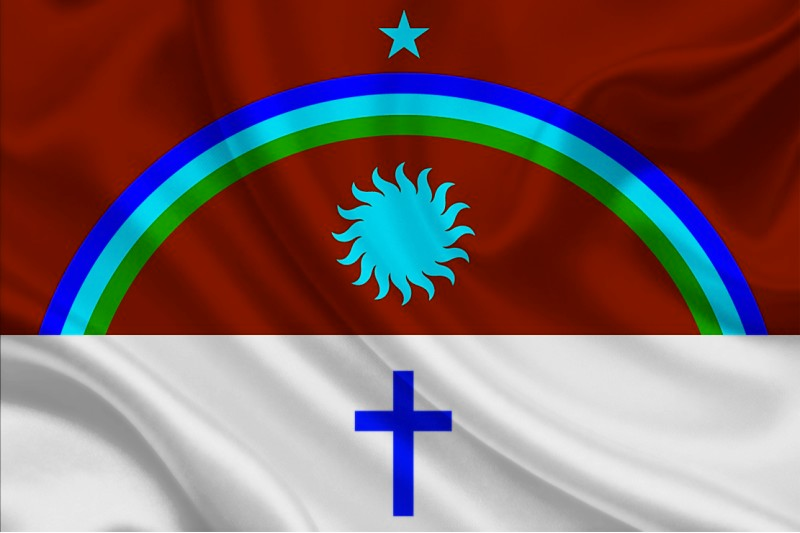

In [123]:
imgInv2 = inverteRGB(imagem2)
cv2_imshow(imgInv2)

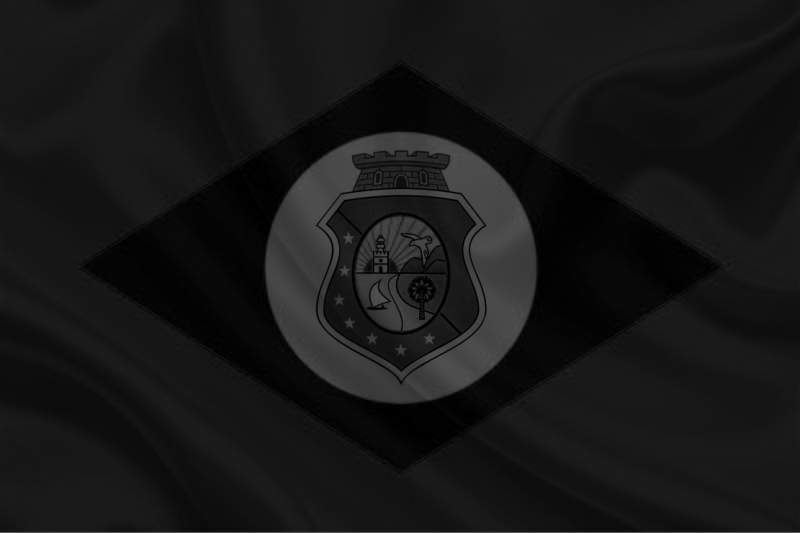

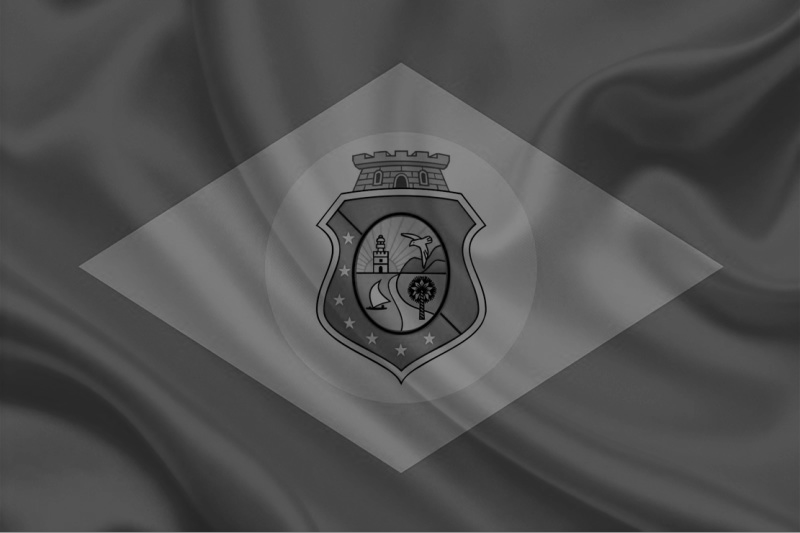

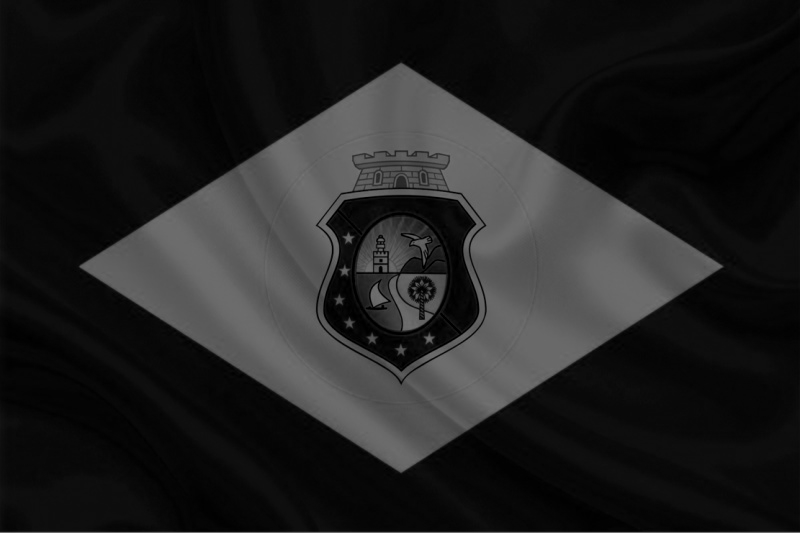

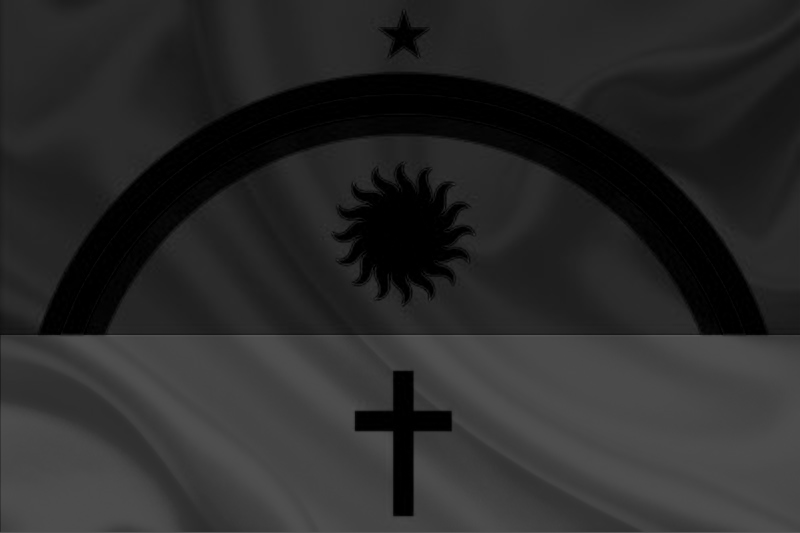

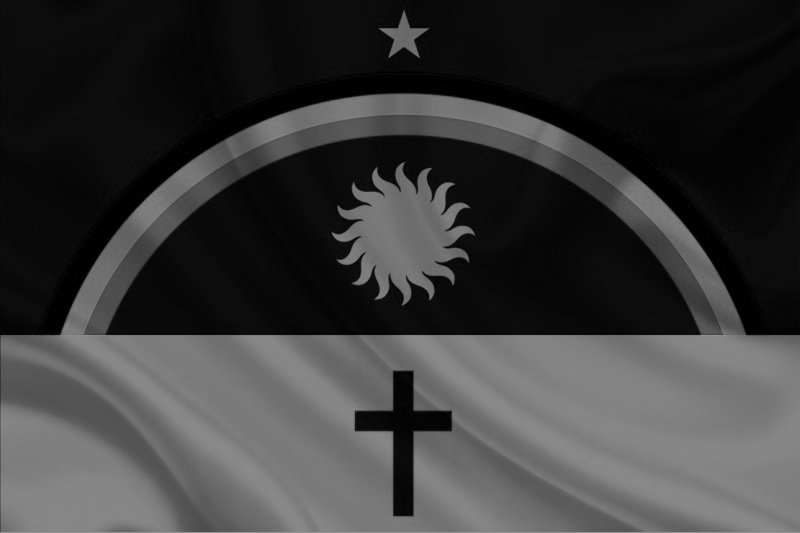

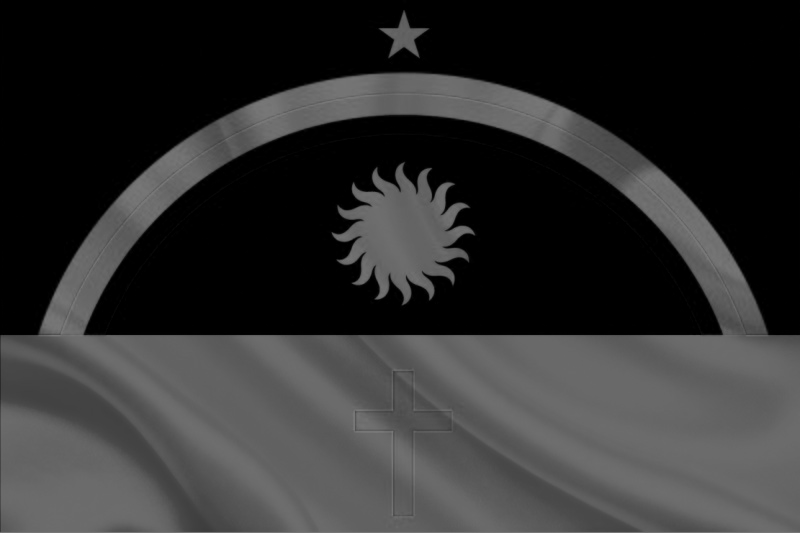

In [124]:
def converteCinza(img):
  (canalAzul, canalVerde, canalVermelho) = cv2.split(img)
  cv2_imshow(canalVermelho/3)
  cv2_imshow(1.75*canalVerde/3)
  cv2_imshow(1.4*canalAzul/3)
  return canalAzul/3, 1.75*canalVerde/3, 1.4*canalVermelho/3

canalAzul1, canalVerde1, canalVermelho1 = converteCinza(imagem1)
canalAzul2, canalVerde2, canalVermelho2 = converteCinza(imagem2)

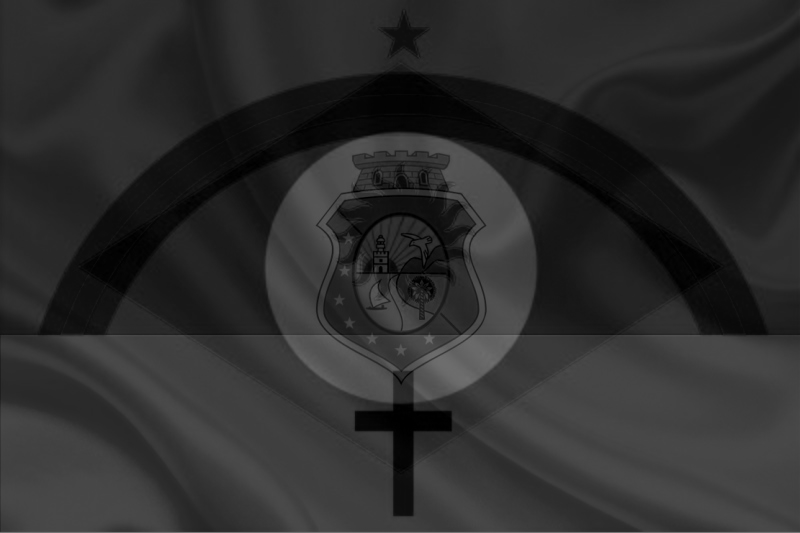

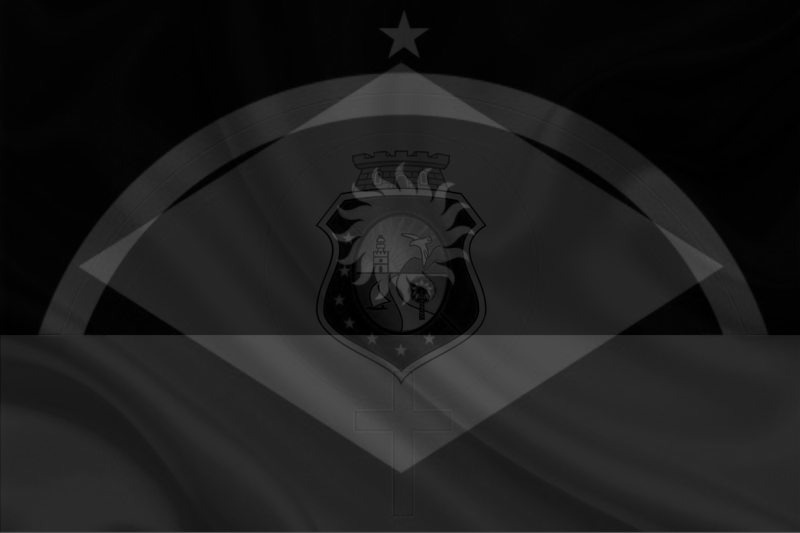

In [125]:
def blendImg(img1,img2):
  res = img1.astype('int32') * 0.5 + img2.astype('int32') * 0.5
  resNp = np.clip(res, 0, 255)
  return resNp

blendImg1 = blendImg(canalVermelho1, canalVermelho2)
cv2_imshow(blendImg1)
blendImg2 = blendImg(canalAzul2, canalAzul1)
cv2_imshow(blendImg2)


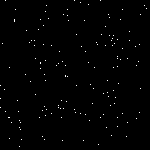

Imagem 1


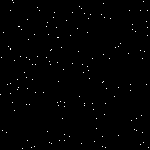

imagem 2


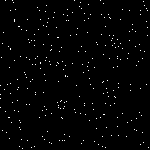

Imagem 1 ou 2


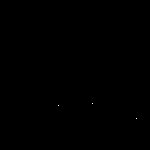

Imagem 1 e 2


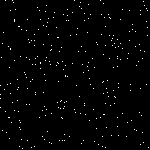

Imagem 1 XOR 2


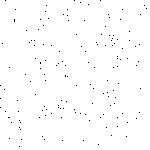

Not imagem 1


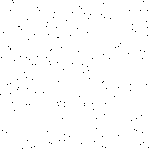

Not imagem 2


In [126]:
def generateBinaryImage(size: int) -> np.array:
  binary_image = np.zeros((size, size), dtype='uint8')
  y = (np.random.randint(0, size, size))
  x = y.copy()
  np.random.shuffle(x)
  binary_image[y, x] = 255
  return binary_image

b1 = generateBinaryImage(150)
b2 = generateBinaryImage(150)
cv2_imshow(b1)
print('Imagem 1')
cv2_imshow(b2)
print('imagem 2')

oneORtwo = np.logical_or(b1,b2).astype(int)
oneORtwo[oneORtwo > 0] = 255
cv2_imshow(oneORtwo)
print('Imagem 1 ou 2')

oneANDtwo = np.logical_and(b1,b2).astype(int)
oneANDtwo[oneANDtwo > 0] = 255
cv2_imshow(oneANDtwo)
print('Imagem 1 e 2')

oneXORtwo = np.logical_xor(b1,b2).astype(int)
oneXORtwo[oneXORtwo > 0] = 255
cv2_imshow(oneXORtwo)
print('Imagem 1 XOR 2')

oneNot = np.logical_not(b1).astype(int)
oneNot[oneNot > 0] = 255
cv2_imshow(oneNot)
print('Not imagem 1')

TwoNot = np.logical_not(b2).astype(int)
TwoNot[TwoNot > 0] = 255
cv2_imshow(TwoNot)
print('Not imagem 2')